In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

*** 
Kappa 30

In [154]:
curve_epsilon_30 = {}
counts = {}
for e, n in [(1e-4, 4), (1e-5, 5), (1e-6, 6), (1e-7, 7), (1e-8, 8), (1e-9, 9), (1e-10, 10)]:
    results_path = f"../results/epsilon_{n}"
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}.json"
    params = parse_experiment_params(params_path)
    results = get_experiment_mean_data(params, results_path)

    curve_epsilon_30[e] = results
    counts[e] = count_experiment_runs(params, results_path)
    
epsilons = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

for n in [4, 5, 6, 7, 8, 9, 10]:
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}.json"
    params = parse_experiment_params(params_path)

    count_per_param = {}
    for param in params:
        epsin_runs = []
        for e in epsilons:
            epsin_runs.append((e, counts[e][make_tuple(param)]))
        count_per_param[make_tuple(param)] = epsin_runs
        
params = list(count_per_param.keys())

y_kappa30 = {}
for k, param in enumerate(params):
    y_kappa30[param[4]] = [x[1] for x in count_per_param[param]]

Kappa 25

In [153]:
curve_epsilon_25 = {}
counts = {}
for e, n in [(1e-4, 4), (1e-5, 5), (1e-6, 6), (1e-7, 7), (1e-8, 8)]:
    results_path = f"../results/epsilon_{n}_kappa_25"
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}_kappa_25.json"
    params = parse_experiment_params(params_path)
    results = get_experiment_mean_data(params, results_path)

    curve_epsilon_25[e] = results
    counts[e] = count_experiment_runs(params, results_path)
    
epsilons = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

for n in [4, 5, 6, 7, 8]:
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}_kappa_25.json"
    params = parse_experiment_params(params_path)

    count_per_param = {}
    for param in params:
        epsin_runs = []
        for e in epsilons:
            epsin_runs.append((e, counts[e][make_tuple(param)]))
        count_per_param[make_tuple(param)] = epsin_runs

params = list(count_per_param.keys())

y_kappa25 = {}
for k, param in enumerate(params):
    y_kappa25[param[4]] = [x[1] for x in count_per_param[param]]

<Axes: title={'center': '$\\kappa = 25, \\;\\; T \\in [800, 1300]$'}, xlabel='Iteration $T$', ylabel='Global Proximity $\\overline{S}$'>

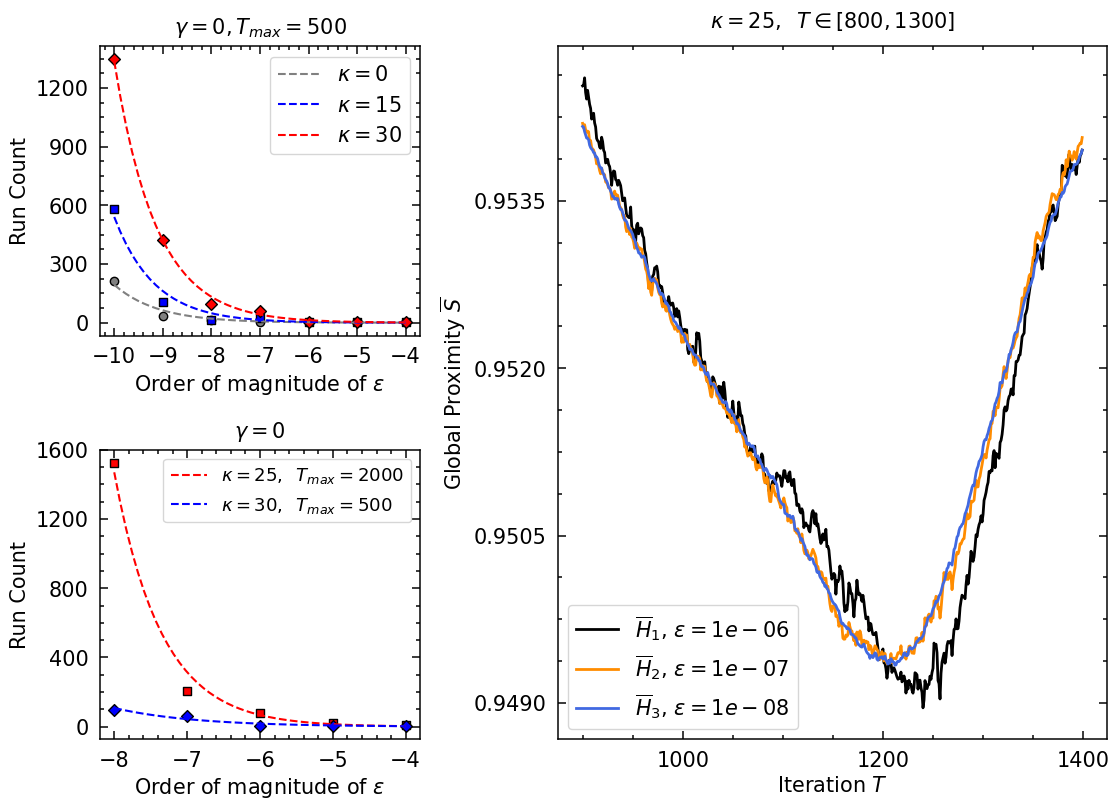

In [146]:
fig = plt.figure(figsize = (13, 9))
fig.subplots_adjust(hspace = 1.3, wspace = 1.5)
ax = fig.add_gridspec(4, 5)

ax1 = fig.add_subplot(ax[0:2, 0:2])
ax2 = fig.add_subplot(ax[2:4, 0:2])
ax3 = fig.add_subplot(ax[0:, 2:])

# plt.tight_layout()

# Formatação do Plot (0, 0)

_ = classical_structure(
    fig,
    ax1,
    1.08,
    8,
    15,
    7,
    5
)
_ = format_text(
    fig,
    ax1,
    [r"$\gamma = 0, T_{max} = 500$"],
    15,
    True,
    'left',
    "Run Count",
    15,
    True,
    r"Order of magnitude of $\epsilon$",
    15
)

# Formatáção do Plot (1, 0)

_ = classical_structure(
    fig,
    ax2,
    1.08,
    8,
    15,
    5,
    5
)
_ = format_text(
    fig,
    ax2,
    [r"$\gamma = 0$"],
    15,
    True,
    'left',
    "Run Count",
    15,
    True,
    r"Order of magnitude of $\epsilon$",
    15
)

# Formatação do Plot (0, 1)

_ = classical_structure(
    fig,
    ax3,
    1.08,
    8,
    15,
    3,
    5
)
_ = format_text(
    fig,
    ax3,
    [r"$\kappa = 25, \;\; T \in [800, 1300]$"],
    15,
    True,
    'left',
    r"Global Proximity $\overline{S}$",
    15,
    True,
    r"Iteration $T$",
    15
)

# Plot (0, 0)
markers = {
    0: 'o',
    15: 's',
    30: 'D'
}
color = {
    0: 'grey',
    15: 'b',
    30: 'r'
}

x = [-4, -5, -6, -7, -8, -9, -10]
for k in [0, 15, 30]:
    ax1.scatter(x, y_kappa30[k], marker = markers[k], c = color[k], edgecolors = 'k')
    
    p = np.polyfit(x, np.log(y_kappa30[k]), 1, w = np.sqrt(y_kappa30[k]))
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 50)
    y_fitted = a * np.exp(b * x_fitted)
    
    ax1.plot(x_fitted, y_fitted, '--', label = rf"$\kappa = {k}$", color = color[k])
    
ax1.legend(loc = 'upper right', fontsize = 15)
    
# Plot (1, 0)
markers = {
    0: 'o',
    15: 's',
    25: 's',
    30: 'D'
}
color = {
    0: 'grey',
    15: 'b',
    25: 'r',
    30: 'b'
}

x = [-4, -5, -6, -7, -8]

ax2.scatter(x, y_kappa25[25], marker = markers[25], c = color[25], edgecolors = 'k')
p = np.polyfit(x, np.log(y_kappa25[25]), 1, w = np.sqrt(y_kappa25[25]))
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 50)
y_fitted = a * np.exp(b * x_fitted)
ax2.plot(x_fitted, y_fitted, '--', label = r"$\kappa = 25, \;\; T_{max} = 2000$", color = color[25])

ax2.scatter(x, y_kappa30[30][:5], marker = markers[30], c = color[30], edgecolors = 'k')
p = np.polyfit(x, np.log(y_kappa30[30][:5]), 1, w = np.sqrt(y_kappa30[30][:5]))
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 50)
y_fitted = a * np.exp(b * x_fitted)
ax2.plot(x_fitted, y_fitted, '--', label = r"$\kappa = 30, \;\; T_{max} = 500$", color = color[30])

ax2.legend(loc = 'upper right', fontsize = 13)

# Plot (0, 1)

param = ('barabasi', 500, 256, 5, 25, 0, 0, 0, 0, 2, 0)

c1 = curve_epsilon[1e-6][param]["proximity"]
c2 = curve_epsilon[1e-7][param]["proximity"]
c3 = curve_epsilon[1e-8][param]['proximity']
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax3.plot(range(len(c1))[900:1400], c1[900:1400], c = 'k', label = r"$\overline{H}_1$" + ", " + rf"$\epsilon = {1e-6}$", linewidth = 2)
ax3.plot(range(len(c1))[900:1400], c2[900:1400], c = 'darkorange', label = r"$\overline{H}_2$" + ", " + rf"$\epsilon = {1e-7}$", linewidth = 2)
ax3.plot(range(len(c1))[900:1400], c3[900:1400], c = 'royalblue', label = r"$\overline{H}_3$" + ", " + rf"$\epsilon = {1e-8}$", linewidth = 2)
ax3.legend(fontsize = 15)

ax3

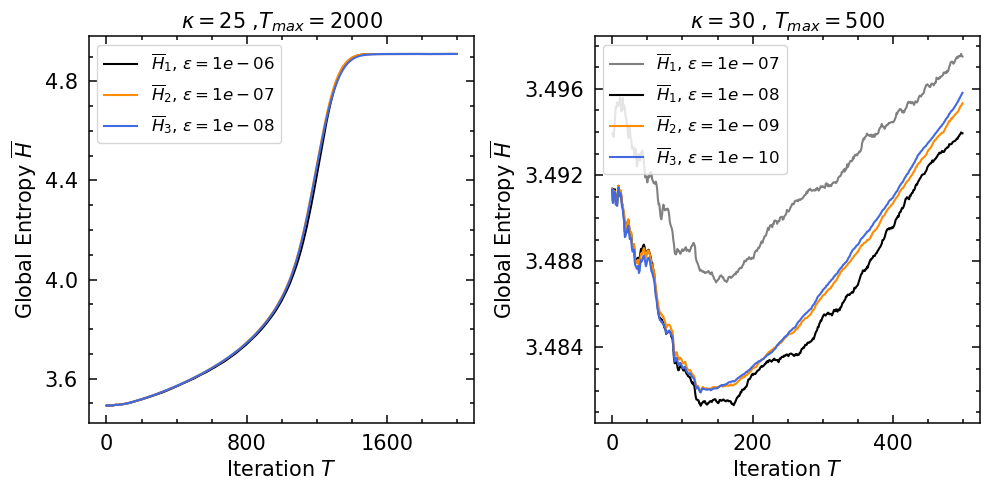

In [158]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(ax[0, 0])
ax2 = fig.add_subplot(ax[0, 1])

# Formatação Plot (0, 0)
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 3
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax1,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax1,
    [r"$\kappa = 25$"],
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# Formatação plot (0, 1)

title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 3
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax2,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax2,
    [r"$\kappa = 30$"],
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)


# Plot (0, 0)
param = ('barabasi', 500, 256, 5, 25, 0, 0, 0, 0, 2, 0)

c1 = curve_epsilon_25[1e-6][param]["entropy"]
c2 = curve_epsilon_25[1e-7][param]["entropy"]
c3 = curve_epsilon_25[1e-8][param]['entropy']
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax1.plot(range(len(c1)), c1, c = 'k', label = r"$\overline{H}_1$" + ", " + rf"$\epsilon = {1e-6}$")
ax1.plot(range(len(c1)), c2, c = 'darkorange', label = r"$\overline{H}_2$" + ", " + rf"$\epsilon = {1e-7}$")
ax1.plot(range(len(c1)), c3, c = 'royalblue', label = r"$\overline{H}_3$" + ", " + rf"$\epsilon = {1e-8}$")
ax1.set_title(fr"$\kappa = {param[4]}$"+r" ,$T_{max} = 2000$", fontsize = title_size)
ax1.legend(fontsize = 12)

# Plot (0, 1)

param = ('barabasi', 500, 256, 5, 30, 0, 0, 0, 0, 2, 0)

c0 = curve_epsilon_30[1e-7][param]["entropy"]
c1 = curve_epsilon_30[1e-8][param]["entropy"]
c2 = curve_epsilon_30[1e-9][param]["entropy"]
c3 = curve_epsilon_30[1e-10][param]['entropy']
error0 = ((c1 - c0)**2).mean()
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax2.plot(range(len(c1)), c0, c = 'grey', label = r"$\overline{H}_1$" + ", " + rf"$\epsilon = {1e-7}$")
ax2.plot(range(len(c1)), c1, c = 'k', label = r"$\overline{H}_1$" + ", " + rf"$\epsilon = {1e-8}$")
ax2.plot(range(len(c1)), c2, c = 'darkorange', label = r"$\overline{H}_2$" + ", " + rf"$\epsilon = {1e-9}$")
ax2.plot(range(len(c1)), c3, c = 'royalblue', label = r"$\overline{H}_3$" + ", " + rf"$\epsilon = {1e-10}$")
ax2.set_title(fr"$\kappa = {param[4]}$"+r" , $T_{max} = 500$", fontsize = title_size)
ax2.legend(fontsize = 12)

fig.tight_layout()